<a href="https://colab.research.google.com/github/vitthal-bhandari/Homophobia-Transphobia-Detection/blob/master/lt_edi_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check GPU and Memory Usage

In [ ]:
#check gpu usage
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Feb 21 20:09:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#check ram usage
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
fp = open("/content/eng_3_train.tsv", "r")
lines = fp.readlines()
fp.close()

fp = open("/content/eng_3_dev.tsv", "r")
lines_dev = fp.readlines()
fp.close()

fp = open("/content/English-test-without-labels.tsv", "r")
lines_test = fp.readlines()
fp.close()

fp = open("/content/tam_3_train.tsv", "r")
tam_lines = fp.readlines()
fp.close()

fp = open("/content/tam_3_dev.tsv", "r")
tam_lines_dev = fp.readlines()
fp.close()

fp = open("/content/Tamil-test-without-labels.tsv", "r")
tam_lines_test = fp.readlines()
fp.close()

In [ ]:
tam_lines_test[:10]

['text\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
 'ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.\tஉன் commant டை பார்த்தவுடன் குபீர் சிரிப்பு வந்தது.\t\tஎதற்காக என்றால் ஆட்சிக்கு வந்தவுடன்.\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
 'தம்பி வாழ்க வளமுடன் 💐👌👌👌\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
 'ஏசுவே துனை சகேதரி\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
 'கண் கலங்கி விட்டது.........\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
 "எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean not sex it's காதல்  also அதை புரிந்து கொள்ளுங்கள் காதல்  செய்யுங்கள் but don't time pass\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n",
 'இதே போல எல்லா விசயத்திலேயும் தனி மனித விருப்பத்துக்கு ஏற்ப சட்டம் வரனும்..\tபிறரை பாதிக்காத தனிமனித சுதந்திரம் அனுபதியளிப்பது தவறில்லை.\tஆனால்\tபோதை பொருளுக்கு தடை விதிக்கிறதும்\tஹெல்மெட் போட கட்டாய படுத்துறதும் தனி மனித பிரச்சினை தானடா கேன புண்டைங்களா..\tஉங்க சட்டத்துல என்....\tவைக்க.\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
 'தேவன் நிச்சயம் சந்திப்பார் 🙏\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\

In [ ]:
category, text = [], []
for line in lines[1:]:
  tokens = line.strip().split("\t")
  category.append(tokens[0])
  text.append(tokens[1])

category_dev, text_dev = [], []
for line in lines_dev[1:]:
  tokens = line.strip().split("\t")
  category_dev.append(tokens[0])
  text_dev.append(tokens[1])

text_test= []
for line in lines_test[1:]:
  tokens = line.strip().split("\t")
  text_test.append(tokens[0])

tam_category, tam_text = [], []
for line in tam_lines[1:]:
  tokens = line.strip().split("\t")
  tam_category.append(tokens[0])
  tam_text.append(tokens[1])

tam_category_dev, tam_text_dev = [], []
for line in tam_lines_dev[1:]:
  tokens = line.strip().split("\t")
  tam_category_dev.append(tokens[0])
  tam_text_dev.append(tokens[1])

tam_text_test= []
for line in tam_lines_test[1:]:
  tokens = line.strip().split("\t")
  tam_text_test.append(tokens[0])

In [ ]:
tam_text_test[:10], len(tam_text_test)

(['ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.',
  'தம்பி வாழ்க வளமுடன் 💐👌👌👌',
  'ஏசுவே துனை சகேதரி',
  'கண் கலங்கி விட்டது.........',
  "எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean not sex it's காதல்  also அதை புரிந்து கொள்ளுங்கள் காதல்  செய்யுங்கள் but don't time pass",
  'இதே போல எல்லா விசயத்திலேயும் தனி மனித விருப்பத்துக்கு ஏற்ப சட்டம் வரனும்..',
  'தேவன் நிச்சயம் சந்திப்பார் 🙏',
  'Gay ah பொறந்து அவங்க தப்பு இல்லை...அது ஆண்டவணின் திருவிளையாட்டால் உருவாக்கப்பட்ட ஒன்று... அதாவது ஹார்மோன் மாறுபாட்டால் ஏற்படுகிறது... ஆனால் சிலர் இயற்கைக்கு மாறானது என்கிறார்கள் அது தவறு... ஏனென்றால் ஆண்டவனால் உருவாக்கப்பட்ட அனைத்தும் இயற்கை தானே அப்படியென்றால் இதுவும் இயற்கை தான்... உண்மையான காதல் என்பது யார் மீது வேண்டுமானாலும் வரலாம்...அதற்கு சாதி,மதம்,ஆண்,பெண் என்று எதுவும் கிடையாது...இந்த உலகத்துல எவனும் கலாச்சாரத்த முறையாக பின்பற்றுவதில்லை இதுவே உண்மை...ஆகையால் ஓரினச்சேர்க்கை என்பது தவறில்லை அவரவர் மனதிற்கு பிடித்த வாழ்க்கையை வாழ்கிறார்கள்... ஏதாவது ஒரு மரம் வித்தியாசமாக இருந்தால் அதனை கடவுள் வணங்

In [ ]:
tam_text[:10], len(tam_text)

(['அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒருபக்கம். +Ve',
  "section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்கள் கருத்து | Homosexuality people's opinion",
  'இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு சாத்து சாத்து சாத்தி இருக்கணும் பொதுமக்கள் அமைதியா போவதால தான் அந்த பொறம்போக்குங்க இப்படி அநாகரிகமா அராஜகமா நடக்குதுங்க . இவங்களுக்கு சப்போர்ட் பண்ற மனித உரிமை ஆர்வலர்கள் திரைப்படத்தில் இவர்களை நல்லவர்களாக சித்தரிக்கும் கயவர்கள் இனியாவது திருந்துவார்களா?',
  'Shanth sha\xa0 உடலுறவு இனப்பெருக்கத்திற்கு மட்டும் என்று சொல்றீங்க! ஆனா அதே நீங்கள் மகப்பேறு மருத்துவமனைகளில் கருத்தடை சாதனங்கள் பெண்கள் ஏற்றுக்கொள்வதை தடுப்பதில்லையே ஏன்? உங்களுக்கு இடிச்சா இரத்தம் எங்களுக்கு இடிச்சா தக்காளி சட்னி!!',
  'ஜீவநதி ப்ரியன்\xa0 hi',
  'இவளயெல்லாம் நாட்டில விட்டு வைப்பதே மிக தவறு   நாய்',
  'ஆமா அண்ணா சரியா சொன்னீங்க govarnmend வேலை குடுத்தா உலகம் தாங்காது',
  'Thirumalai Nambirajan Perumal\xa0 சுண்ணி நீ சிந்சிக்கிட்டே இரு',
  'பண்றது டிச்சிங் டிச்சிங். இதுல நியாய மயிறு வேற போடி ஏலியன் மண்டை.',
  

Create dataframe

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [ ]:
data = { 'category': category, 
        'text': text}
df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  3164 non-null   object
 1   text      3164 non-null   object
dtypes: object(2)
memory usage: 49.6+ KB


In [ ]:
data_dev = { 'category': category_dev, 
        'text': text_dev}
df_dev = pd.DataFrame(data_dev)

df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  792 non-null    object
 1   text      792 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB


In [ ]:
data_test = { 'text': text_test}
df_test = pd.DataFrame(data_test)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
tam_data = { 'category': tam_category, 
        'text': tam_text}
tam_df = pd.DataFrame(tam_data)

tam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2662 non-null   object
 1   text      2662 non-null   object
dtypes: object(2)
memory usage: 41.7+ KB


In [ ]:
tam_data_dev = { 'category': tam_category_dev, 
        'text': tam_text_dev}
tam_df_dev = pd.DataFrame(tam_data_dev)

tam_df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  666 non-null    object
 1   text      666 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [ ]:
tam_data_test = { 'text': tam_text_test}
tam_df_test = pd.DataFrame(tam_data_test)

tam_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    833 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [ ]:
df['category'] = df['category'].replace('Non-anti-LGBT+ content', 'ally')
df_dev['category'] = df_dev['category'].replace('Non-anti-LGBT+ content', 'ally')
tam_df['category'] = tam_df['category'].replace('Non-anti-LGBT+ content', 'ally')
tam_df_dev['category'] = tam_df_dev['category'].replace('Non-anti-LGBT+ content', 'ally')

In [ ]:
tam_df.head()

,category,text
0,Transphobic,அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...
1,ally,section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...
2,Transphobic,இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...
3,ally,Shanth sha உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...
4,ally,ஜீவநதி ப்ரியன் hi


In [ ]:
#learning the distribution of comments
print(df['category'].value_counts())
print(df_dev['category'].value_counts())
print(tam_df['category'].value_counts())
print(tam_df_dev['category'].value_counts())

ally           3001
Homophobic      157
Transphobic       6
Name: category, dtype: int64
ally           732
Homophobic      58
Transphobic      2
Name: category, dtype: int64
ally           2022
Homophobic      485
Transphobic     155
Name: category, dtype: int64
ally           526
Homophobic     103
Transphobic     37
Name: category, dtype: int64


In [ ]:
df['category'] = df['category'].replace('ally', 0)
df_dev['category'] = df_dev['category'].replace('ally', 0)
tam_df['category'] = tam_df['category'].replace('ally', 0)
tam_df_dev['category'] = tam_df_dev['category'].replace('ally', 0)

df['category'] = df['category'].replace('Homophobic', 1)
df_dev['category'] = df_dev['category'].replace('Homophobic', 1)
tam_df['category'] = tam_df['category'].replace('Homophobic', 1)
tam_df_dev['category'] = tam_df_dev['category'].replace('Homophobic', 1)

df['category'] = df['category'].replace('Transphobic', 2)
df_dev['category'] = df_dev['category'].replace('Transphobic', 2)
tam_df['category'] = tam_df['category'].replace('Transphobic', 2)
tam_df_dev['category'] = tam_df_dev['category'].replace('Transphobic', 2)

**English**

|             | Train (3164)  | Dev (792)    | Test (990)   | Total (4946) |
|-------------|---------------|--------------|--------------|--------------|
| Ally        | 3001 (94.84%) | 732 (92.42%) | 924 (93.33%) | 4657         |
| Homophobic  | 157 (4.96%)   | 58 (7.32%)   | 61 (6.16%)   | 276          |
| Transphobic | 6 (0.2%)      | 2 (0.25%)    | 5 (0.5%)     | 13           |


---

**Tamil**

|             | Train (2662)  | Dev (666)    | Test (833)   | Total (4161) |
|-------------|---------------|--------------|--------------|--------------|
| Ally        | 2022 (75.99%) | 526 (78.97%) | 657 (78.87%) | 3205         |
| Homophobic  | 485 (18.22%)   | 103 (15.46%)  | 135 (16.20%)  | 723          |
| Transphobic | 155 (5.8%)    | 37 (5.55%)   | 41 (4.92%)    | 233           |

Normalizing and Vectorizing the data

# GLoVe with BiLSTM

In [ ]:
#keras tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

cat_tok = Tokenizer(split=' ', lower=True)

text_tok = Tokenizer(split=' ', lower=True, oov_token='<OOV>')

cat_dev_tok = Tokenizer(split=' ', lower=True)

text_dev_tok = Tokenizer(split=' ', lower=True, oov_token='<OOV>')

In [ ]:
cat_tok.fit_on_texts(df['category'])
text_tok.fit_on_texts(df['text'])

cat_dev_tok.fit_on_texts(df_dev['category'])
text_dev_tok.fit_on_texts(df_dev['text'])

In [ ]:
cat_config = cat_tok.get_config()
text_config = text_tok.get_config()

cat_dev_config = cat_dev_tok.get_config()
text_dev_config = text_dev_tok.get_config()

In [ ]:
print(cat_config)
print(cat_dev_config)

{'num_words': None, 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 'lower': True, 'split': ' ', 'char_level': False, 'oov_token': None, 'document_count': 3164, 'word_counts': '{"ally": 3001, "homophobic": 157, "transphobic": 6}', 'word_docs': '{"ally": 3001, "homophobic": 157, "transphobic": 6}', 'index_docs': '{"1": 3001, "2": 157, "3": 6}', 'index_word': '{"1": "ally", "2": "homophobic", "3": "transphobic"}', 'word_index': '{"ally": 1, "homophobic": 2, "transphobic": 3}'}
{'num_words': None, 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 'lower': True, 'split': ' ', 'char_level': False, 'oov_token': None, 'document_count': 792, 'word_counts': '{"homophobic": 58, "ally": 732, "transphobic": 2}', 'word_docs': '{"homophobic": 58, "ally": 732, "transphobic": 2}', 'index_docs': '{"2": 58, "1": 732, "3": 2}', 'index_word': '{"1": "ally", "2": "homophobic", "3": "transphobic"}', 'word_index': '{"ally": 1, "homophobic": 2, "transphobic": 3}'}


In [ ]:
cat_vocab = eval(cat_config['index_word'])
text_vocab = eval(text_config['index_word'])

print("Unique words in train vocab:", len(text_vocab))
print("Unique words in train labels:", len(cat_vocab))

cat_dev_vocab = eval(cat_dev_config['index_word'])
text_dev_vocab = eval(text_dev_config['index_word'])

print("Unique words in dev vocab:", len(text_dev_vocab))
print("Unique words in dev labels:", len(cat_dev_vocab))

Unique words in train vocab: 6295
Unique words in train labels: 3
Unique words in dev vocab: 2741
Unique words in dev labels: 3


In [ ]:
print(cat_config['word_counts'])

{"ally": 3001, "homophobic": 157, "transphobic": 6}


In [ ]:
x_tok = text_tok.texts_to_sequences(df['text'])
y_tok = cat_tok.texts_to_sequences(df['category'])

x_dev_tok = text_dev_tok.texts_to_sequences(df_dev['text'])
y_dev_tok = cat_dev_tok.texts_to_sequences(df_dev['category'])

In [ ]:
print(text_tok.sequences_to_texts([x_tok[1]]))
print(df['text'][1])


['priyadharshini kannan\xa0 same gender attraction with sex is not an love first love is an mental diesaese with more positive side effects but same side gender attraction relevant to sex is an crazy brother']
priyadharshini kannan  same gender attraction with sex is not an love first.. Love is an mental diesaese with more positive side effects.. But same side gender attraction relevant to sex is an crazy brother


In [ ]:
print(text_dev_tok.sequences_to_texts([x_dev_tok[0]]))
print(df_dev['text'][0])

['govt must appoint a thiru nangai police to arrest these people']
Govt must appoint a thiru nangai police to arrest these people


In [ ]:
length=[]
MAX_SEQ_LEN=0
MIN_SEQ_LEN=10000
SUM=0
for i in range (len(x_tok)):
  l=len(x_tok[i])
  length.append({'length':l})
  if l>MAX_SEQ_LEN:
    MAX_SEQ_LEN=l
  if MIN_SEQ_LEN>l:
    MIN_SEQ_LEN=l
  SUM+=l

print('MAX SEQUENCE LENGTH is ',MAX_SEQ_LEN)
print('MIN SEQUENCE LENGTH is ',MIN_SEQ_LEN)
print('AVERAGE SEQUENCE LENGTH is ',SUM/len(x_tok))

length_dev=[]
MAX_SEQ_LEN_dev=0
MIN_SEQ_LEN_dev=10000
SUM_dev=0
for i in range (len(x_dev_tok)):
  l=len(x_dev_tok[i])
  length_dev.append({'length':l})
  if l>MAX_SEQ_LEN_dev:
    MAX_SEQ_LEN_dev=l
  if MIN_SEQ_LEN_dev>l:
    MIN_SEQ_LEN_dev=l
  SUM_dev+=l

print('MAX DEV SEQUENCE LENGTH is ',MAX_SEQ_LEN_dev)
print('MIN DEV SEQUENCE LENGTH is ',MIN_SEQ_LEN_dev)
print('AVERAGE DEV SEQUENCE LENGTH is ',SUM_dev/len(x_dev_tok))

MAX SEQUENCE LENGTH is  179
MIN SEQUENCE LENGTH is  0
AVERAGE SEQUENCE LENGTH is  15.27496839443742
MAX DEV SEQUENCE LENGTH is  180
MIN DEV SEQUENCE LENGTH is  0
AVERAGE DEV SEQUENCE LENGTH is  15.38510101010101


In [ ]:
df_length=pd.DataFrame(length)
df_dev_length=pd.DataFrame(length_dev)

In [ ]:
df_length.describe()

,length
count,3164.000000
mean,15.274968
std,19.925587
min,0.000000
25%,5.000000
50%,8.000000
75%,17.000000
max,179.000000


In [ ]:
df_dev_length.describe()

,length
count,792.000000
mean,15.385101
std,20.963382
min,0.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,180.000000


taking max_len as 20 since it would account for high majority of length variance

In [ ]:
# now, padding seqences to a maximum length
from tensorflow.keras.preprocessing import sequence

max_len = 20

x_pad = sequence.pad_sequences(x_tok, padding='post', truncating='post', maxlen=max_len)

x_dev_pad = sequence.pad_sequences(x_dev_tok, padding='post', truncating='post', maxlen=max_len)

In [ ]:
print(x_pad.shape, y_pad.shape, x_dev_pad.shape)

(3164, 20) (3164, 20) (792, 20)


In [ ]:
text_tok.sequences_to_texts([x_pad[1]])

['priyadharshini kannan\xa0 same gender attraction with sex is not an love first love is an mental diesaese with more positive']

In [ ]:
cat_tok.sequences_to_texts([y_pad[1]])

['transphobic']

Downloading GloVe vectors

In [ ]:
#Download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2022-01-17 09:37:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-01-17 09:37:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-17 09:37:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
dict_w2v={}
with open('glove.6B.300d.txt', "r") as file:
  for line in file:
    tokens=line.split()
    word=tokens[0]
    vector=np.array(tokens[1:], dtype=np.float32)
    if vector.shape[0] == 300:
      dict_w2v[word]=vector
    else:
      print("There was an issue with "+word)
print("Dictionary Size: ", len(dict_w2v))

Dictionary Size:  400000


In [ ]:
embedding_dim=300
embedding_matrix=np.zeros((len(text_vocab)+1, embedding_dim))

In [ ]:
text_vocab

In [ ]:
unk_cnt=0
unk_set=set()
for word in text_vocab.values():
  embedding_vector=dict_w2v.get(word)
  if embedding_vector is not None:
    tkn_id=eval(text_config['word_index'])[word]
    embedding_matrix[tkn_id]=embedding_vector
  else:
    unk_cnt+=1
    unk_set.add(word)

print("Total unknown words: ", unk_cnt)

Total unknown words:  1752


In [ ]:
embedding_matrix.shape

(6296, 300)

In [ ]:
num_classes = len(cat_vocab)+1

Y = tf.keras.utils.to_categorical(y_tok, num_classes=num_classes)
Y_dev = tf.keras.utils.to_categorical(y_dev_tok, num_classes=num_classes)
print(Y.shape, Y_dev.shape)

(3164, 4) (792, 4)


In [ ]:
# Length of the vocabulary
vocab_size = len(text_vocab) + 1
# The embedding dimension
embedding_dim = 300
# Number of RNN units
rnn_units = 100
#batch size
BATCH_SIZE=90
# num of classes
num_classes = len(cat_vocab) + 1

In [ ]:
#instantiating a simple BiLSTM model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, TimeDistributed, Dense
dropout=0.5
def build_model_bilstm(vocab_size, embedding_dim, rnn_units, batch_size, classes, train_emb=True):
  model = tf.keras.Sequential([
                               Embedding(vocab_size, embedding_dim, mask_zero=True, weights=[embedding_matrix], trainable=train_emb),
                               Bidirectional(LSTM(units=rnn_units, return_sequences=True, dropout=dropout)),
                               Bidirectional(LSTM(rnn_units, dropout=dropout/2)),
                               Dense(num_classes, activation="softmax")
      ])
  
  return model

In [ ]:
model = build_model_bilstm(
                        vocab_size = vocab_size,
                        embedding_dim=embedding_dim,
                        rnn_units=rnn_units,
                        batch_size=BATCH_SIZE,
                        classes=num_classes)
model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         1888800   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 200)        320800    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 4)                 804       
                                                                 
Total params: 2,451,204
Trainable params: 2,451,204
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_pad.shape

(3164, 20)

In [ ]:
print(x_pad[:5])
print(Y[:10])

[[   5   89   63   30  844 2615    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [1784  758  112  155  692   37   92    4   14  123   22  152   22    4
   123  593 2616   37   69  641]
 [  15   17  380    6  642  236   53 1787  236   64 2617    0    0    0
     0    0    0    0    0    0]
 [1387 2618   15    5   22    8   19  130   15    0    0    0    0    0
     0    0    0    0    0    0]
 [ 139    4 1788  198  278   70  278    0    0    0    0    0    0    0
     0    0    0    0    0    0]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
#train the model
model.fit(x_pad, Y, batch_size=BATCH_SIZE, epochs=15)

Epoch 1/15
36/36 [==============================] - 19s 48ms/step - loss: 0.3677 - accuracy: 0.9219
Epoch 2/15
36/36 [==============================] - 2s 47ms/step - loss: 0.2059 - accuracy: 0.9469
Epoch 3/15
36/36 [==============================] - 2s 46ms/step - loss: 0.1840 - accuracy: 0.9482
Epoch 4/15
36/36 [==============================] - 2s 47ms/step - loss: 0.1508 - accuracy: 0.9513
Epoch 5/15
36/36 [==============================] - 2s 46ms/step - loss: 0.1248 - accuracy: 0.9592
Epoch 6/15
36/36 [==============================] - 2s 46ms/step - loss: 0.0845 - accuracy: 0.9735
Epoch 7/15
36/36 [==============================] - 2s 46ms/step - loss: 0.0516 - accuracy: 0.9817
Epoch 8/15
36/36 [==============================] - 2s 45ms/step - loss: 0.0418 - accuracy: 0.9845
Epoch 9/15
36/36 [==============================] - 2s 45ms/step - loss: 0.0303 - accuracy: 0.9902
Epoch 10/15
36/36 [==============================] - 2s 47ms/step - loss: 0.0254 - accuracy: 0.9927
Epoch 11

In [ ]:
#evaluate on dev set
model.evaluate(x_dev_pad, Y_dev)

25/25 [==============================] - 6s 11ms/step - loss: 0.9732 - accuracy: 0.8914


[0.9731621146202087, 0.8914141654968262]

## Confusion Matrix

In [ ]:
y_dev_pred=(model.predict(x_dev_pad) > 0.5).astype("float32")

In [ ]:
Y_dev[:10]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
tf.math.confusion_matrix(np.argmax(Y_dev, axis=1), np.argmax(y_dev_pred, axis=1))

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[  0,   0,   0,   0],
       [  5, 702,  25,   0],
       [  0,  57,   1,   0],
       [  0,   2,   0,   0]], dtype=int32)>

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 8.8 MB/s 


In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa
metric = tfa.metrics.F1Score(num_classes=4, average='weighted')
metric.update_state(Y_dev, y_dev_pred)
result = metric.result()
result.numpy()

0.87089056

# BERT

## Tokenization and normalization with BERT

In [ ]:
from transformers import BertTokenizer
bert_name='bert-base-cased'
tokenizer=BertTokenizer.from_pretrained(bert_name, 
                                        add_special_tokens=True, 
                                        do_lower_case=False, 
                                        max_length=20,
                                        pad_to_max_length=True)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [ ]:
def bert_encoder(review):
  encoded=tokenizer.encode_plus(review, add_special_tokens=True,
                                max_length=20, pad_to_max_length=True,
                                truncation=True,
                                return_attention_mask=True,
                                return_token_type_ids=True)
  return encoded['input_ids'], encoded['token_type_ids'], encoded['attention_mask']

In [ ]:
bert_train=[]
for i, sequence in enumerate(df['text']):
  bert_train.append( bert_encoder(sequence) )

In [ ]:
bert_lbl=[]
for i, sequence in enumerate(df['category']):
  bert_lbl.append( sequence )

In [ ]:
bert_train=np.array(bert_train)
bert_lbl=tf.keras.utils.to_categorical(bert_lbl, num_classes=3)

In [ ]:
bert_val=[]
for i, sequence in enumerate(df_dev['text']):
  bert_val.append( bert_encoder(sequence) )

In [ ]:
bert_val_lbl=[]
for i, sequence in enumerate(df_dev['category']):
  bert_val_lbl.append( sequence )

In [ ]:
bert_val=np.array(bert_val)
bert_val_lbl=tf.keras.utils.to_categorical(bert_val_lbl, num_classes=3)

In [ ]:
print(bert_train.shape, bert_lbl.shape)

(3164, 3, 20) (3164, 3)


In [ ]:
tr_reviews, tr_segments, tr_masks=np.split(bert_train, 3, axis=1)
val_reviews, val_segments, val_masks=np.split(bert_val, 3, axis=1)

In [ ]:
tr_reviews=tr_reviews.squeeze()
tr_segments=tr_segments.squeeze()
tr_masks=tr_masks.squeeze()
val_reviews=val_reviews.squeeze()
val_segments=val_segments.squeeze()
val_masks=val_masks.squeeze()

In [ ]:
def example_to_features(input_ids, attention_masks, token_type_ids, y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids}, y

train_ds=tf.data.Dataset.from_tensor_slices((tr_reviews, tr_masks, tr_segments, bert_lbl)).map(example_to_features).shuffle(100).batch(32)

valid_ds=tf.data.Dataset.from_tensor_slices((val_reviews, val_masks, val_segments, bert_val_lbl)).map(example_to_features).shuffle(100).batch(32)

## Custom model with BERT

In [ ]:
from transformers import TFBertModel
bert_name='bert-base-cased'
bert=TFBertModel.from_pretrained(bert_name)
bert.summary()

Some weights of the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
max_seq_len=20
inp_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="input_ids")
att_mask=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="attention_mask")
seq_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="token_type_ids")


In [ ]:
train_ds.element_spec

({'attention_mask': TensorSpec(shape=(None, 20), dtype=tf.int64, name=None),
  'input_ids': TensorSpec(shape=(None, 20), dtype=tf.int64, name=None),
  'token_type_ids': TensorSpec(shape=(None, 20), dtype=tf.int64, name=None)},
 TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))

In [ ]:
inp_dict={
    "input_ids":inp_ids,
    "attention_mask":att_mask,
    "token_type_ids":seq_ids
}
outputs=bert(inp_dict)

outputs

(<KerasTensor: shape=(None, 20, 768) dtype=float32 (created by layer 'tf_bert_model_2')>,
 <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model_2')>)

In [ ]:
x=tf.keras.layers.Dropout(0.5)(outputs[1])
x=tf.keras.layers.Dense(200, activation='relu')(x)
x=tf.keras.layers.Dropout(0.25)(x)
y=tf.keras.layers.Dense(3, activation='softmax')(x)
custom_model=tf.keras.models.Model(inputs=inp_dict, outputs=y)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5)
loss=tf.keras.losses.CategoricalCrossentropy()
custom_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
custom_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 20)]         0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 20)]         0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 20)]         0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  ((None, 20, 768),    108310272   ['attention_mask[0][0]',         
                                 (None, 768))                     'input_ids[0][0]',        

In [ ]:
history=custom_model.fit(train_ds, epochs=7, validation_data=valid_ds)

Epoch 1/7
99/99 [==============================] - 28s 149ms/step - loss: 0.0706 - accuracy: 0.9731 - val_loss: 0.4856 - val_accuracy: 0.9369
Epoch 2/7
99/99 [==============================] - 12s 125ms/step - loss: 0.0217 - accuracy: 0.9943 - val_loss: 0.5076 - val_accuracy: 0.9205
Epoch 3/7
99/99 [==============================] - 12s 125ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.5620 - val_accuracy: 0.9255
Epoch 4/7
99/99 [==============================] - 12s 125ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.5995 - val_accuracy: 0.9268
Epoch 5/7
99/99 [==============================] - 12s 125ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.6260 - val_accuracy: 0.9331
Epoch 6/7
99/99 [==============================] - 12s 125ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.6975 - val_accuracy: 0.9318
Epoch 7/7
99/99 [==============================] - 12s 124ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.7046 - val_accuracy: 0.9293


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

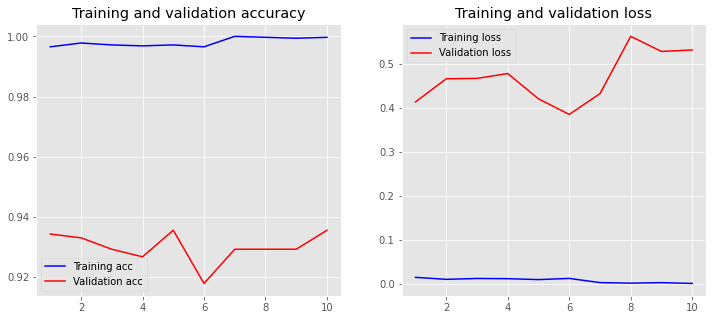

In [ ]:
plot_history(history)

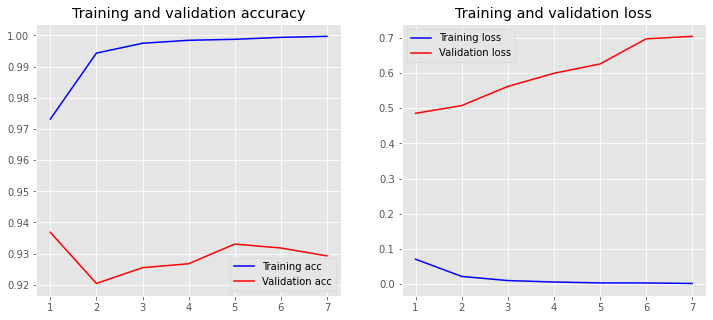

In [ ]:
plot_history(history)

In [ ]:
valid_pred=(custom_model.predict(valid_ds) > 0.5).astype("float32")

In [ ]:
tf.math.confusion_matrix(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[711,  21,   0],
       [ 57,   1,   0],
       [  2,   0,   0]], dtype=int32)>

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa
metric = tfa.metrics.F1Score(num_classes=3, average='weighted')
metric.update_state(bert_val_lbl, valid_pred)
result = metric.result()
result.numpy()

     |████████████████████████████████| 1.1 MB 9.6 MB/s 


0.87684596

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['ally', 'homophobic', 'transphobic']

In [ ]:
print(classification_report(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.97      0.95       732
  homophobic       0.05      0.02      0.03        58
 transphobic       0.00      0.00      0.00         2

    accuracy                           0.90       792
   macro avg       0.32      0.33      0.32       792
weighted avg       0.86      0.90      0.88       792



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EDA

In [ ]:
import nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
!git clone https://github.com/jasonwei20/eda_nlp.git

Cloning into 'eda_nlp'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 396 (delta 6), reused 10 (delta 4), pack-reused 379
Receiving objects: 100% (396/396), 20.42 MiB | 25.40 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [ ]:
%cd eda_nlp/code

/content/eda_nlp/code/eda_nlp/code


In [ ]:
!ls

augment.py  eda.py  __pycache__


## Run EDA on homophobic sentences

In [ ]:
df_homophobic=df[df.category == 1]
df_homophobic.head

<bound method NDFrame.head of       category                                               text
1            1  priyadharshini kannan  same gender attraction ...
22           1  Really excellent movie....I feel that no one a...
31           1                                  Madam read bible 
94           1  it's due to abnormalities present sexual dimor...
96           1  i think u too gay....thats y u telling  with t...
...        ...                                                ...
2971         1  Even Dogs know its pair.. It might not  be wit...
2974         1  They are bastards morning 4 o clock they are s...
3026         1                           Its not good 👆👎👎👎👎👎👎👎😏😑😣
3038         1  Human being is going to destroyed LPGT. This i...
3060         1  anu lavanya  it seems that some people likely ...

[157 rows x 2 columns]>

In [ ]:
df_homophobic.head(1000)

,category,text
1,1,priyadharshini kannan same gender attraction ...
22,1,Really excellent movie....I feel that no one a...
31,1,Madam read bible
94,1,it's due to abnormalities present sexual dimor...
96,1,i think u too gay....thats y u telling with t...
...,...,...
2971,1,Even Dogs know its pair.. It might not be wit...
2974,1,They are bastards morning 4 o clock they are s...
3026,1,Its not good 👆👎👎👎👎👎👎👎😏😑😣
3038,1,Human being is going to destroyed LPGT. This i...


In [ ]:
df_homophobic.to_csv('homophobic.txt', sep="\t", header=False, index=False)

In [ ]:
! python augment.py --input=homophobic.txt --num_aug=16

generated augmented sentences with eda for homophobic.txt to eda_homophobic.txt with num_aug=16


## Run EDA on transphobic sentences

In [ ]:
df_transphobic=df[df.category == 2]
df_transphobic.head

<bound method NDFrame.head of       category                                               text
401          2                                         Sex the 9.
1090         2  Magalakshmi Mukunthan Ella transgalayum konnud...
1340         2  Today also one transgender scolded me for not ...
1418         2  Rajeswari Rajagopalan ; Sister....last week fo...
2331         2      Hey seriously I thought She was a Transgender
2766         2  Every transenter says they are doing prostitui...>

In [ ]:
df_transphobic.to_csv('transphobic.txt', sep="\t", header=False, index=False)

In [ ]:
! python augment.py --input=transphobic.txt --num_aug=32

generated augmented sentences with eda for transphobic.txt to eda_transphobic.txt with num_aug=32


## Combine augmented sentences with original dataframe

In [ ]:
!ls

augment.py	    eda.py		 homophobic.txt  transphobic.txt
eda_homophobic.txt  eda_transphobic.txt  __pycache__


In [ ]:
df_homophobic_aug=pd.read_csv('eda_homophobic.txt', sep="\t", names=["category", "text"])
df_transphobic_aug=pd.read_csv('eda_transphobic.txt', sep="\t", names=["category", "text"])

In [ ]:
df_homophobic_aug.head

<bound method NDFrame.head of       category                                               text
0            1  with kannan same gender attraction with sex fi...
1            1  priyadharshini kannan same gender attraction w...
2            1  priyadharshini kannan gender attraction with s...
3            1  comrade priyadharshini kannan same gender attr...
4            1  priyadharshini sex same gender attraction an s...
...        ...                                                ...
2664         1  anu lavanya it seems that some multitude in al...
2665         1  anu lavanya it appear that some people likely ...
2666         1  anu lavanya it seems that some mass likely to ...
2667         1  to lavanya it seems that some people likely to...
2668         1  anu lavanya it seems that some people likely t...

[2669 rows x 2 columns]>

In [ ]:
df_transphobic_aug.head

<bound method NDFrame.head of      category                                               text
0           2                                            the sex
1           2                                         gender the
2           2                                    wind up sex the
3           2                                            the sex
4           2                                            the sex
..        ...                                                ...
193         2  every transenter aver they are doing prostitui...
194         2  every transenter say they are doing prostituio...
195         2  every transenter enjoin they are doing prostit...
196         2  every transenter says they are doing prostitui...
197         2  every transenter says they are doing prostitui...

[198 rows x 2 columns]>

In [ ]:
df_homophobic_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2669 non-null   int64 
 1   text      2669 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.8+ KB


In [ ]:
df_transphobic_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  198 non-null    int64 
 1   text      198 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
# get dataframe for ally class since we need to reduce size of this class
df_ally=df[df.category == 0]
df_ally['category'].value_counts()

0    3001
Name: category, dtype: int64

In [ ]:
df_ally_shuffled=df_ally.sample(frac=1)
df_ally_shuffled_subset=df_ally_shuffled.iloc[:1500]

In [ ]:
df_ally_shuffled_subset.head

<bound method NDFrame.head of       category                                               text
1170         0  That's really a great thing done by galata Cha...
1915         0         You are such a most sensible human being..
2226         0  Only swiggy boys in Nungambakkam know,she is w...
650          0            7.54 to 8.05 am crying anna  vera level
839          0  Yes love is love it does not matter about gend...
...        ...                                                ...
2715         0  Thanks for talking about marginalized and ostr...
2938         0  Shiva Ranjan Yov, do you even think before you...
1027         0  I love the movie I love the couple I missing t...
233          0  It is nice n needed one 🙏and I wish you 🤝🤝all ...
1619         0                                   She is beautiful

[1500 rows x 2 columns]>

So now we have 5 dataframes which we will combine and then reshuffle


1.   df_ally_shuffled_subset: **label 0, size 3001**
2.   df_homophobic: **label 1, size 157**
3.   df_transphobic: **label 2, size 6**
4.   df_homophobic_aug: **label 1, size 2669**
5.   df_transphobic_aug: **label 2, size 198**


---


## Modified data

|             | Train (3835)  | Dev (792)    | Test (990)   | Total (4946) |
|-------------|---------------|--------------|--------------|--------------|
| Ally        | 2000 (52.9%) | 732 (92.42%) | 924 (93.33%) | 4657         |
| Homophobic  | 1727 (45.7%)   | 58 (7.32%)   | 61 (6.16%)   | 276          |
| Transphobic | 108 (2.3%)      | 2 (0.25%)    | 5 (0.5%)     | 13           |

In [ ]:
frames = [df_ally_shuffled_subset, df_homophobic, df_transphobic, df_homophobic_aug, df_transphobic_aug]
df_aug = pd.concat(frames)

In [ ]:
df_aug.info

<bound method DataFrame.info of       category                                               text
1170         0  That's really a great thing done by galata Cha...
1915         0         You are such a most sensible human being..
2226         0  Only swiggy boys in Nungambakkam know,she is w...
650          0            7.54 to 8.05 am crying anna  vera level
839          0  Yes love is love it does not matter about gend...
...        ...                                                ...
193          2  every transenter aver they are doing prostitui...
194          2  every transenter say they are doing prostituio...
195          2  every transenter enjoin they are doing prostit...
196          2  every transenter says they are doing prostitui...
197          2  every transenter says they are doing prostitui...

[4530 rows x 2 columns]>

In [ ]:
# re shuffling dataframe

df_aug_shuffled = df_aug.sample(frac=1).reset_index(drop=True)
df_aug_shuffled.info

<bound method DataFrame.info of       category                                               text
0            0  First of all stop considering them as a tortur...
1            2  rajeswari rajagopalan sister last week for not...
2            0                      Good humanity  for the sister
3            1  bible coz omosexual is sin human against resou...
4            1  its about what just we see and what we feel bu...
...        ...                                                ...
4525         1  horrible people like this should be such immed...
4526         0  I like lesbian.....I think women and men sex s...
4527         1  what happens if all people lesbian and gays in...
4528         0  Bro....nice as usual.... ; I think u could sta...
4529         1     very bad human god not created review for this

[4530 rows x 2 columns]>

In [ ]:
df_aug_shuffled['category'].value_counts()

1    2826
0    1500
2     204
Name: category, dtype: int64

In [ ]:
df_aug_shuffled.head(10)

,category,text
0,0,First of all stop considering them as a tortur...
1,2,rajeswari rajagopalan sister last week for not...
2,0,Good humanity for the sister
3,1,bible coz omosexual is sin human against resou...
4,1,its about what just we see and what we feel bu...
5,1,sodomity sin is court sin
6,0,Love you ka. Looking so beautiful. My best wis...
7,1,bharat india wont progress
8,0,That's good girl
9,1,now sexual make fun diseases infections pour d...


In [ ]:
df_aug_shuffled.to_csv('final_data.csv')

# BERT with EDA

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from transformers import BertTokenizer
bert_name='bert-base-cased'
tokenizer=BertTokenizer.from_pretrained(bert_name, 
                                        add_special_tokens=True, 
                                        do_lower_case=False, 
                                        max_length=180,
                                        pad_to_max_length=True)

In [ ]:
def bert_encoder(review):
  encoded=tokenizer.encode_plus(review, add_special_tokens=True,
                                max_length=180, pad_to_max_length=True,
                                truncation=True,
                                return_attention_mask=True,
                                return_token_type_ids=True)
  return encoded['input_ids'], encoded['token_type_ids'], encoded['attention_mask']

In [ ]:
bert_train=[]
for i, sequence in enumerate(df_aug_shuffled['text']):
  bert_train.append( bert_encoder(sequence) )

In [ ]:
bert_lbl=[]
for i, sequence in enumerate(df_aug_shuffled['category']):
  bert_lbl.append( sequence )

In [ ]:
bert_train=np.array(bert_train)
bert_lbl=tf.keras.utils.to_categorical(bert_lbl, num_classes=3)

In [ ]:
bert_val=[]
for i, sequence in enumerate(df_dev['text']):
  bert_val.append( bert_encoder(sequence) )

In [ ]:
bert_val_lbl=[]
for i, sequence in enumerate(df_dev['category']):
  bert_val_lbl.append( sequence )

In [ ]:
bert_val=np.array(bert_val)
bert_val_lbl=tf.keras.utils.to_categorical(bert_val_lbl, num_classes=3)

In [ ]:
print(bert_train.shape, bert_lbl.shape)

(4722, 3, 180) (4722, 3)


In [ ]:
tr_reviews, tr_segments, tr_masks=np.split(bert_train, 3, axis=1)
val_reviews, val_segments, val_masks=np.split(bert_val, 3, axis=1)

In [ ]:
tr_reviews=tr_reviews.squeeze()
tr_segments=tr_segments.squeeze()
tr_masks=tr_masks.squeeze()
val_reviews=val_reviews.squeeze()
val_segments=val_segments.squeeze()
val_masks=val_masks.squeeze()

In [ ]:
def example_to_features(input_ids, attention_masks, token_type_ids, y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids}, y

train_ds=tf.data.Dataset.from_tensor_slices((tr_reviews, tr_masks, tr_segments, bert_lbl)).map(example_to_features).shuffle(100).batch(16)

valid_ds=tf.data.Dataset.from_tensor_slices((val_reviews, val_masks, val_segments, bert_val_lbl)).map(example_to_features).shuffle(100).batch(16)

In [ ]:
from transformers import TFBertModel
bert_name='bert-base-cased'
bert=TFBertModel.from_pretrained(bert_name)
bert.summary()

Some weights of the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
max_seq_len=180
inp_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="input_ids")
att_mask=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="attention_mask")
seq_ids=tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="token_type_ids")


In [ ]:
inp_dict={
    "input_ids":inp_ids,
    "attention_mask":att_mask,
    "token_type_ids":seq_ids
}
outputs=bert(inp_dict)

outputs

(<KerasTensor: shape=(None, 180, 768) dtype=float32 (created by layer 'tf_bert_model_5')>,
 <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model_5')>)

In [ ]:
x=tf.keras.layers.Dropout(0.4)(outputs[1])
x=tf.keras.layers.Dense(50, activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
y=tf.keras.layers.Dense(3, activation='softmax')(x)
custom_model=tf.keras.models.Model(inputs=inp_dict, outputs=y)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5)
loss=tf.keras.losses.CategoricalCrossentropy()
custom_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
custom_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 180)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 180)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 180)]        0           []                               
                                                                                                  
 tf_bert_model_5 (TFBertModel)  ((None, 180, 768),   108310272   ['attention_mask[0][0]',         
                                 (None, 768))                     'input_ids[0][0]',        

In [ ]:
history=custom_model.fit(train_ds, epochs=2, validation_data=valid_ds)

Epoch 1/2
296/296 [==============================] - 133s 400ms/step - loss: 0.3721 - accuracy: 0.8547 - val_loss: 0.2897 - val_accuracy: 0.9116
Epoch 2/2
296/296 [==============================] - 115s 390ms/step - loss: 0.0894 - accuracy: 0.9706 - val_loss: 0.2882 - val_accuracy: 0.9179


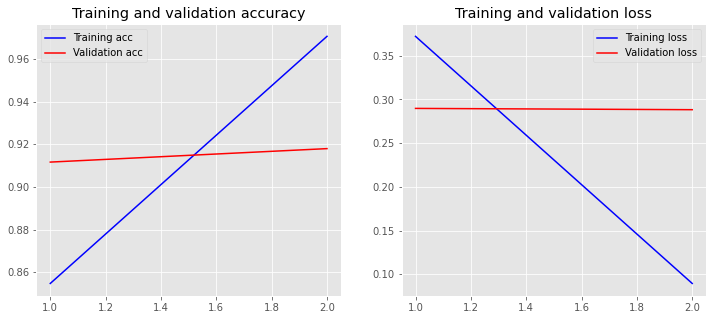

In [ ]:
plot_history(history)

In [ ]:
valid_pred=(custom_model.predict(valid_ds) > 0.5).astype("float32")

In [ ]:
tf.math.confusion_matrix(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[714,  18,   0],
       [ 57,   1,   0],
       [  2,   0,   0]], dtype=int32)>

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['ally', 'homophobic', 'transphobic']

In [ ]:
print(classification_report(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1), target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.98      0.95       732
  homophobic       0.05      0.02      0.03        58
 transphobic       0.00      0.00      0.00         2

    accuracy                           0.90       792
   macro avg       0.33      0.33      0.32       792
weighted avg       0.86      0.90      0.88       792



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report = classification_report(np.argmax(bert_val_lbl, axis=1), np.argmax(valid_pred, axis=1), target_names=target_names, output_dict=True)

In [ ]:
df_report = pd.DataFrame(report).transpose()

In [ ]:
df_report.to_csv('report2.csv')

# mBERT (Simple Transformers)

In [ ]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

     |████████████████████████████████| 248 kB 4.1 MB/s 
     |████████████████████████████████| 6.8 MB 36.2 MB/s 
     |████████████████████████████████| 3.5 MB 36.8 MB/s 
     |████████████████████████████████| 9.7 MB 35.3 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 311 kB 47.3 MB/s 
     |████████████████████████████████| 1.7 MB 39.7 MB/s 
     |████████████████████████████████| 1.2 MB 47.0 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 895 kB 51.6 MB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 181 kB 53.2 MB/s 
     |████████████████████████████████| 144 kB 49.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 243 kB 52.3 MB/s 
     |████████████████████████████████| 133 kB 53.2 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
     |███████████████

simpletransformers==0.63.4


In [ ]:
df_aug_shuffled.head()

,category,text
0,0,First of all stop considering them as a tortur...
1,2,rajeswari rajagopalan sister last week for not...
2,0,Good humanity for the sister
3,1,bible coz omosexual is sin human against resou...
4,1,its about what just we see and what we feel bu...


In [ ]:
df_dev.head()

,category,text
0,1,Govt must appoint a thiru nangai police to arr...
1,0,Archana Shree what
2,0,they probably dont want to live in your devan'...
3,0,Haha she is so cute and innocent
4,0,I love it 💗💗💗


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
    num_labels=3,
    args=train_args
)

In [ ]:
df_aug_shuffled=df_aug_shuffled[["text", "category"]]
df_aug_shuffled = df_aug_shuffled.rename(columns={'text': 'text', 'category': 'labels'})
df_aug_shuffled.head()

,text,labels
0,please watch evening shadows on netflix a gay ...,0
1,lol just leave i habit change my perception bc...,1
2,priyadharshini are you telling narrow minded o...,1
3,vetri kamalakannan read bible fool only then y...,1
4,in above video mostly she is telling about abu...,1


In [ ]:
df_dev=df_dev[["text", "category"]]
df_dev = df_dev.rename(columns={'text': 'text', 'category': 'labels'})
df_dev.head()

,text,labels
0,Govt must appoint a thiru nangai police to arr...,1
1,Archana Shree what,0
2,they probably dont want to live in your devan'...,0
3,Haha she is so cute and innocent,0
4,I love it 💗💗💗,0


In [ ]:
df_dev['labels'].value_counts()

0    732
1     58
2      2
Name: labels, dtype: int64

**De-emojification**

In [ ]:
! pip install emoji --upgrade

     |████████████████████████████████| 174 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=28eeb6b0173a834ddab48f8270a1b2bde40a6bf15ef615bb93d9e659b0b2a144
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
import emoji

In [ ]:
df_aug_shuffled['text'] = df_aug_shuffled['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
df_dev['text'] = df_dev['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

**Remove punctuation**

In [ ]:
#keras tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer


train_text_tok = Tokenizer(split=' ', lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
train_text_tok.fit_on_texts(df_aug_shuffled['text'])

dev_text_tok = Tokenizer(split=' ', lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
dev_text_tok.fit_on_texts(df_dev['text'])

In [ ]:
train_tok = train_text_tok.texts_to_sequences(df_aug_shuffled['text'])

df_aug_shuffled['text'] = df_aug_shuffled.apply(lambda row: train_text_tok.sequences_to_texts([train_tok[row.name]])[0], axis=1)

In [ ]:
dev_tok = dev_text_tok.texts_to_sequences(df_dev['text'])

df_dev['text'] = df_dev.apply(lambda row: dev_text_tok.sequences_to_texts([dev_tok[row.name]])[0], axis=1)

In [ ]:
df_dev.head(10)

,text,labels
0,govt must appoint a thiru nangai police to arr...,1
1,archana shree what,0
2,they probably dont want to live in your devan'...,0
3,haha she is so cute and innocent,0
4,i love it growing heart growing heart growing ...,0
5,such a caring guy smiling face with heart eyes...,0
6,madam malini tell me which religion history al...,0
7,the only wrong thing in this movie is harish's...,0
8,the best interview i have seen hugs malini,0
9,great bro awaiting,0


**Spell Checking**

In [ ]:
! pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 14.4 MB/s 


In [ ]:
from spellchecker import SpellChecker

In [ ]:
spell = SpellChecker()

spell.word_frequency.load_words(['lgbt', 'lgbtq', 'lgbtqia+'])

In [ ]:
# find those words that may be misspelled
misspelled = spell.unknown(["transgenderd"])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

transgender
{'transgenders', 'transgendered', 'transgender'}


**Train model**

In [ ]:
df_aug_shuffled['labels'].value_counts()

1    2826
0    1500
2     204
Name: labels, dtype: int64

In [ ]:
# Train the model
model.train_model(df_aug_shuffled)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/4530 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/142 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/142 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/142 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(426, 0.24671342143102465)

**Evaluate model**

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(df_dev, f1=f1_multiclass, acc=accuracy_score)

result

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/792 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_3_2


Running Evaluation:   0%|          | 0/25 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.38318700028654823, 'f1': 0.46375013324805453, 'acc': 0.9204545454545454, 'eval_loss': 0.35315446943044665}


{'acc': 0.9204545454545454,
 'eval_loss': 0.35315446943044665,
 'f1': 0.46375013324805453,
 'mcc': 0.38318700028654823}

In [ ]:
dev=df_dev['text'].tolist()
dev

In [ ]:
predictions, raw_outputs = model.predict(dev)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/792 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
labels=df_dev['labels'].tolist()
labels

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(labels, predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.95      0.96      0.96       732
  homophobic       0.48      0.40      0.43        58
 transphobic       0.00      0.00      0.00         2

    accuracy                           0.92       792
   macro avg       0.48      0.45      0.46       792
weighted avg       0.91      0.92      0.92       792



In [ ]:
tf.math.confusion_matrix(labels, predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[706,  25,   1],
       [ 35,  23,   0],
       [  2,   0,   0]], dtype=int32)>

**Test model**

In [ ]:
df_test.describe

<bound method NDFrame.describe of                                                   text
0        Spr....2016 poitan feel happy with my partner
1                            R u still with ur partner
2    excellent movie..no unnecessary drama or scene...
3    For those who speak about culture., pre marita...
4    Best movie and people not understand relations...
..                                                 ...
994                                                   
995                                                   
996                                                   
997                                                   
998                                                   

[999 rows x 1 columns]>

In [ ]:
# pre-process test dataset before making predictions
test_list=df_test['text'].tolist()

# de-emojification
df_test['text'] = df_test['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

# de-punctualization
test_text_tok = Tokenizer(split=' ', lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
test_text_tok.fit_on_texts(df_test['text'])
test_tok = test_text_tok.texts_to_sequences(df_test['text'])
df_test['text'] = df_test.apply(lambda row: test_text_tok.sequences_to_texts([test_tok[row.name]])[0], axis=1)

# list after pre-processing
test_list_preprocessed=df_test['text'].tolist()

In [ ]:
test_list[:10]

['Spr....2016 poitan feel happy with my partner',
 'R u still with ur partner',
 'excellent movie..no unnecessary drama or scenes.. was very natural..back ground music is really superb..thank u everyone involved fr giving a wonderful movie to watch..best thing was the lead actors were depicted MALE-ISH.. quite contrary to most directors who like to show gay love happens between some one who has FEMININE body and thoughts..well done sir. Looking forward fr more movies frm U.',
 'For those who speak about culture., pre marital sex, illegal affairs after marriage, rape and a long lost will continue which is not Indian culture . Being gay/ lesbian/ transgender Is hormone imbalance, even before they are born. It’s not they choose to become. Even your son or daughter can be.. Like if you agree, and I don’t care for dislikes or hate replies.',
 'Best movie and people not understand relationship feeling I miss my life',
 'Awesome....😎 everyone should respect them...',
 '99% tamilans cant under

In [ ]:
test_list_preprocessed[:10]

['spr 2016 poitan feel happy with my partner',
 'r u still with ur partner',
 'excellent movie no unnecessary drama or scenes was very natural back ground music is really superb thank u everyone involved fr giving a wonderful movie to watch best thing was the lead actors were depicted male ish quite contrary to most directors who like to show gay love happens between some one who has feminine body and thoughts well done sir looking forward fr more movies frm u',
 'for those who speak about culture pre marital sex illegal affairs after marriage rape and a long lost will continue which is not indian culture being gay lesbian transgender is hormone imbalance even before they are born it’s not they choose to become even your son or daughter can be like if you agree and i don’t care for dislikes or hate replies',
 'best movie and people not understand relationship feeling i miss my life',
 'awesome smiling face with sunglasses everyone should respect them',
 '99 tamilans cant understand r a

In [ ]:
predictions_test, raw_outputs = model.predict(test_list_preprocessed)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
data_final_english = {'category':predictions_test,
        'text':test_list}

df_final_english = pd.DataFrame(data_final_english)

df_final_english

,category,text
0,0,Spr....2016 poitan feel happy with my partner
1,0,R u still with ur partner
2,0,excellent movie..no unnecessary drama or scene...
3,0,"For those who speak about culture., pre marita..."
4,0,Best movie and people not understand relations...
...,...,...
994,0,
995,0,
996,0,
997,0,


In [ ]:
df_final_english['category'] = df_final_english['category'].replace(0, 'Non-anti-LGBT+ content')

df_final_english['category'] = df_final_english['category'].replace(1, 'Homophobic')

df_final_english['category'] = df_final_english['category'].replace(2, 'Transphobic')

In [ ]:
df_final_english.drop(df_final_english.tail(9).index,
        inplace = True)

In [ ]:
df_final_english['category'].value_counts()

Non-anti-LGBT+ content    938
Homophobic                 52
Name: category, dtype: int64

In [ ]:
# saving as tsv file
df_final_english.to_csv('final_english.tsv', sep="\t", index=False)

# Tamil with mBERT

In [ ]:
tam_df=tam_df[["text", "category"]]
tam_df = tam_df.rename(columns={'text': 'text', 'category': 'labels'})
print(tam_df.head())

tam_df_dev=tam_df_dev[["text", "category"]]
tam_df_dev = tam_df_dev.rename(columns={'text': 'text', 'category': 'labels'})
print(tam_df_dev.head())

                                                text  labels
0  அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...       2
1  section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...       0
2  இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...       2
3  Shanth sha  உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...       0
4                                 ஜீவநதி ப்ரியன்  hi       0
                                                text  labels
0  Blue Lilly  u can even consider me as an athei...       0
1  திருநங்கை நல்ல மனசு கொண்டவர்கள்... , நீங்கள் க...       0
2                 மொதல்ல தமிழ் மொழியை கேவல படுத்தாத.       0
3  கவலைப்படாதே.உன்.குடும்பத்தில் கண்டிப்பா.ஒரு தி...       0
4  துலுக்க நாடுகள்ல தான் ஓரிணசேர்க்கை அதிகமா ஓரிண...       1


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
tam_df.head(10)

,text,labels
0,அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...,2
1,section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...,0
2,இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...,2
3,Shanth sha உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...,0
4,ஜீவநதி ப்ரியன் hi,0
5,இவளயெல்லாம் நாட்டில விட்டு வைப்பதே மிக தவறு ...,1
6,ஆமா அண்ணா சரியா சொன்னீங்க govarnmend வேலை குடு...,0
7,Thirumalai Nambirajan Perumal சுண்ணி நீ சிந்ச...,0
8,பண்றது டிச்சிங் டிச்சிங். இதுல நியாய மயிறு வேற...,1
9,முதல்ல இங்க பேட்டி கொடுக்குற பிராணி ஆனா பெண்ணா...,1


In [ ]:
tam_df['text'] = tam_df['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
tam_df_dev['text'] = tam_df_dev['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

In [ ]:
tam_df.head(10)

,text,labels
0,அர்த்தநாரீஸ்வரர் ஆணுமானவர் பெண்ணுமானவர். இது ஒ...,2
1,section377 | ஓரினச்சேர்க்கை நல்லதா கெட்டதா மக்...,0
2,இருக்கிற நாலு பேர் சேர்ந்து அந்த பொறம்போக்கு ச...,2
3,Shanth sha உடலுறவு இனப்பெருக்கத்திற்கு மட்டும...,0
4,ஜீவநதி ப்ரியன் hi,0
5,இவளயெல்லாம் நாட்டில விட்டு வைப்பதே மிக தவறு ...,1
6,ஆமா அண்ணா சரியா சொன்னீங்க govarnmend வேலை குடு...,0
7,Thirumalai Nambirajan Perumal சுண்ணி நீ சிந்ச...,0
8,பண்றது டிச்சிங் டிச்சிங். இதுல நியாய மயிறு வேற...,1
9,முதல்ல இங்க பேட்டி கொடுக்குற பிராணி ஆனா பெண்ணா...,1


In [ ]:
# Train the model
model.train_model(tam_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/2662 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/84 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(252, 0.5247217227542211)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(tam_df_dev, f1=f1_multiclass, acc=accuracy_score)

result

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/666 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_3_2


Running Evaluation:   0%|          | 0/21 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.6385855189539876, 'f1': 0.7243257135945815, 'acc': 0.8768768768768769, 'eval_loss': 0.3488215867962156}


{'acc': 0.8768768768768769,
 'eval_loss': 0.3488215867962156,
 'f1': 0.7243257135945815,
 'mcc': 0.6385855189539876}

In [ ]:
tam_dev=tam_df_dev['text'].tolist()
tam_dev[:5]

['Blue Lilly\xa0 u can even consider me as an atheist... so plzzz மதம் ரீதியாக அ\u200cல்லது மார்கம் ரீதியாக பேசவேண்டாம்...',
 'திருநங்கை நல்ல மனசு கொண்டவர்கள்... , நீங்கள் கடைசியாக இல்லாதவங்களுக்கு சாப்பாடு கொடுத்து சூப்பர் நண்பா thumbs_up ',
 'மொதல்ல தமிழ் மொழியை கேவல படுத்தாத.',
 'கவலைப்படாதே.உன்.குடும்பத்தில் கண்டிப்பா.ஒரு திருநங்கை.பிறக்கும் டா',
 'துலுக்க நாடுகள்ல தான் ஓரிணசேர்க்கை அதிகமா ஓரிணசேர்க்கைல ஈடு படுரானுக துலுக்கன் சூத்துல ஓக்குறத தான் அதிகம் விரும்புவான் முகமது நபி கூட ஒரு ஓரிணசேர்க்கையாளன் தான்.']

In [ ]:
tam_predictions, tam_raw_outputs = model.predict(tam_dev)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/666 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
tam_labels=tam_df_dev['labels'].tolist()
tam_labels[:5]

[0, 0, 0, 0, 1]

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(tam_labels, tam_predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.94      0.93       526
  homophobic       0.70      0.72      0.71       103
 transphobic       0.63      0.46      0.53        37

    accuracy                           0.88       666
   macro avg       0.75      0.71      0.72       666
weighted avg       0.87      0.88      0.87       666



In [ ]:
tf.math.confusion_matrix(tam_labels, tam_predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[493,  26,   7],
       [ 26,  74,   3],
       [ 15,   5,  17]], dtype=int32)>

**Test model**

In [ ]:
tam_df_test.describe

<bound method NDFrame.describe of                                                   text
0            ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.
1                             தம்பி வாழ்க வளமுடன் 💐👌👌👌
2                                    ஏசுவே துனை சகேதரி
3                          கண் கலங்கி விட்டது.........
4    எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean ...
..                                                 ...
828  அழகான தமிழில் அழகான உச்சரிப்போடு, சிரித்த முகத...
829                                   ரயில்வே போலீஸ்!!
830                                 Siva Siva  என்னது?
831                                அந்த சகோதரி  அம்மா
832  ஏண்டா புண்ட திருநங்கை தப்பா சொல்லுரிங்ஙளே அவுங...

[833 rows x 1 columns]>

In [ ]:
# pre-process test dataset before making predictions
tam_test_list=tam_df_test['text'].tolist()

# de-emojification
tam_df_test['text'] = tam_df_test['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

# list after pre-processing
tam_test_list_preprocessed=tam_df_test['text'].tolist()

In [ ]:
tam_test_list[:10]

['ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.',
 'தம்பி வாழ்க வளமுடன் 💐👌👌👌',
 'ஏசுவே துனை சகேதரி',
 'கண் கலங்கி விட்டது.........',
 "எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean not sex it's காதல்  also அதை புரிந்து கொள்ளுங்கள் காதல்  செய்யுங்கள் but don't time pass",
 'இதே போல எல்லா விசயத்திலேயும் தனி மனித விருப்பத்துக்கு ஏற்ப சட்டம் வரனும்..',
 'தேவன் நிச்சயம் சந்திப்பார் 🙏',
 'Gay ah பொறந்து அவங்க தப்பு இல்லை...அது ஆண்டவணின் திருவிளையாட்டால் உருவாக்கப்பட்ட ஒன்று... அதாவது ஹார்மோன் மாறுபாட்டால் ஏற்படுகிறது... ஆனால் சிலர் இயற்கைக்கு மாறானது என்கிறார்கள் அது தவறு... ஏனென்றால் ஆண்டவனால் உருவாக்கப்பட்ட அனைத்தும் இயற்கை தானே அப்படியென்றால் இதுவும் இயற்கை தான்... உண்மையான காதல் என்பது யார் மீது வேண்டுமானாலும் வரலாம்...அதற்கு சாதி,மதம்,ஆண்,பெண் என்று எதுவும் கிடையாது...இந்த உலகத்துல எவனும் கலாச்சாரத்த முறையாக பின்பற்றுவதில்லை இதுவே உண்மை...ஆகையால் ஓரினச்சேர்க்கை என்பது தவறில்லை அவரவர் மனதிற்கு பிடித்த வாழ்க்கையை வாழ்கிறார்கள்... ஏதாவது ஒரு மரம் வித்தியாசமாக இருந்தால் அதனை கடவுள் வணங்குகிறீர்

In [ ]:
tam_test_list_preprocessed[:10]

['ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.',
 'தம்பி வாழ்க வளமுடன்  bouquet  OK_hand  OK_hand  OK_hand ',
 'ஏசுவே துனை சகேதரி',
 'கண் கலங்கி விட்டது.........',
 "எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean not sex it's காதல்  also அதை புரிந்து கொள்ளுங்கள் காதல்  செய்யுங்கள் but don't time pass",
 'இதே போல எல்லா விசயத்திலேயும் தனி மனித விருப்பத்துக்கு ஏற்ப சட்டம் வரனும்..',
 'தேவன் நிச்சயம் சந்திப்பார்  folded_hands ',
 'Gay ah பொறந்து அவங்க தப்பு இல்லை...அது ஆண்டவணின் திருவிளையாட்டால் உருவாக்கப்பட்ட ஒன்று... அதாவது ஹார்மோன் மாறுபாட்டால் ஏற்படுகிறது... ஆனால் சிலர் இயற்கைக்கு மாறானது என்கிறார்கள் அது தவறு... ஏனென்றால் ஆண்டவனால் உருவாக்கப்பட்ட அனைத்தும் இயற்கை தானே அப்படியென்றால் இதுவும் இயற்கை தான்... உண்மையான காதல் என்பது யார் மீது வேண்டுமானாலும் வரலாம்...அதற்கு சாதி,மதம்,ஆண்,பெண் என்று எதுவும் கிடையாது...இந்த உலகத்துல எவனும் கலாச்சாரத்த முறையாக பின்பற்றுவதில்லை இதுவே உண்மை...ஆகையால் ஓரினச்சேர்க்கை என்பது தவறில்லை அவரவர் மனதிற்கு பிடித்த வாழ்க்கையை வாழ்கிறார்கள்... ஏதாவது ஒரு மரம் வி

In [ ]:
tam_predictions_test, tam_raw_outputs = model.predict(tam_test_list_preprocessed)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/833 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

In [ ]:
data_final_tamil = {'category':tam_predictions_test,
        'text':tam_test_list}

df_final_tamil = pd.DataFrame(data_final_tamil)

df_final_tamil

,category,text
0,0,ஒவ்வொரு commanta படித்து கொண்டு வந்தபோது.
1,0,தம்பி வாழ்க வளமுடன் 💐👌👌👌
2,0,ஏசுவே துனை சகேதரி
3,0,கண் கலங்கி விட்டது.........
4,0,எல்லாரும் ஒன்று புறிந்து கொள்ளுங்கள் Gay mean ...
...,...,...
828,0,"அழகான தமிழில் அழகான உச்சரிப்போடு, சிரித்த முகத..."
829,0,ரயில்வே போலீஸ்!!
830,0,Siva Siva என்னது?
831,0,அந்த சகோதரி அம்மா


In [ ]:
df_final_tamil['category'] = df_final_tamil['category'].replace(0, 'Non-anti-LGBT+ content')

df_final_tamil['category'] = df_final_tamil['category'].replace(1, 'Homophobic')

df_final_tamil['category'] = df_final_tamil['category'].replace(2, 'Transphobic')

In [ ]:
df_final_tamil['category'].value_counts()

Non-anti-LGBT+ content    678
Homophobic                133
Transphobic                22
Name: category, dtype: int64

In [ ]:
# saving as tsv file
df_final_tamil.to_csv('final_tamil.tsv', sep="\t", index=False)

# Tamil with XLM roBERTa

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 16,
             "eval_batch_size": 16,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5}

# Create a ClassificationModel
model = ClassificationModel(
    "xlmroberta", "xlm-roberta-base",
    num_labels=3,
    args=train_args
)

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:460: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  f"use_multiprocessing automatically disabled as {model_type}"


In [ ]:
# Train the model
model.train_model(tam_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_xlmroberta_128_3_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of xlmroberta model complete. Saved to outputs/.


(501, 0.588188296767647)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(tam_df_dev, f1=f1_multiclass, acc=accuracy_score)

result

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/666 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlmroberta_128_3_2


Running Evaluation:   0%|          | 0/42 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.5183052066480096, 'f1': 0.49989777544590847, 'acc': 0.8228228228228228, 'eval_loss': 0.4051359079423405}


{'acc': 0.8228228228228228,
 'eval_loss': 0.4051359079423405,
 'f1': 0.49989777544590847,
 'mcc': 0.5183052066480096}

In [ ]:
predictions=np.argmax(model_outputs, axis=1)
print(len(predictions))
print(predictions)

666
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 1 0 

In [ ]:
bert_val_lbl=[]
for i, sequence in enumerate(tam_df_dev['labels']):
  bert_val_lbl.append( sequence )
print(len(bert_val_lbl))
print(bert_val_lbl)

666
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(bert_val_lbl, predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.93      0.90      0.91       526
  homophobic       0.48      0.75      0.59       103
 transphobic       0.00      0.00      0.00        37

    accuracy                           0.82       666
   macro avg       0.47      0.55      0.50       666
weighted avg       0.81      0.82      0.81       666



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tf.math.confusion_matrix(bert_val_lbl, predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[471,  55,   0],
       [ 26,  77,   0],
       [ 10,  27,   0]], dtype=int32)>

# Tamil with IndicBERT

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 3,
             "max_seq_length": 128,
             "train_batch_size": 16,
             "eval_batch_size": 16,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 2e-5}

# Create a ClassificationModel
model = ClassificationModel(
    "albert", "ai4bharat/indic-bert",
    num_labels=3,
    args=train_args
)

Downloading:   0%|          | 0.00/507 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129M [00:00<?, ?B/s]

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertForSequenceClassification: ['predictions.decoder.bias', 'sop_classifier.classifier.bias', 'predictions.decoder.weight', 'predictions.bias', 'predictions.LayerNorm.weight', 'sop_classifier.classifier.weight', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indi

Downloading:   0%|          | 0.00/5.38M [00:00<?, ?B/s]

In [ ]:
# Train the model
model.train_model(tam_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/2662 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_albert_128_3_2


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/167 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of albert model complete. Saved to outputs/.


(501, 0.5416278333929246)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result, model_outputs, wrong_predictions = model.eval_model(tam_df_dev, f1=f1_multiclass, acc=accuracy_score)

result

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/666 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_albert_128_3_2


Running Evaluation:   0%|          | 0/42 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.4040073330633772, 'f1': 0.4680119581464873, 'acc': 0.8243243243243243, 'eval_loss': 0.43238538024680956}


{'acc': 0.8243243243243243,
 'eval_loss': 0.43238538024680956,
 'f1': 0.4680119581464873,
 'mcc': 0.4040073330633772}

In [ ]:
predictions=np.argmax(model_outputs, axis=1)
print(len(predictions))
print(predictions)

666
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 

In [ ]:
bert_val_lbl=[]
for i, sequence in enumerate(tam_df_dev['labels']):
  bert_val_lbl.append( sequence )
print(len(bert_val_lbl))
print(bert_val_lbl)

666
[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(bert_val_lbl, predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.86      0.96      0.90       526
  homophobic       0.58      0.44      0.50       103
 transphobic       0.00      0.00      0.00        37

    accuracy                           0.82       666
   macro avg       0.48      0.47      0.47       666
weighted avg       0.77      0.82      0.79       666



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tf.math.confusion_matrix(bert_val_lbl, predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[504,  22,   0],
       [ 58,  45,   0],
       [ 27,  10,   0]], dtype=int32)>

# CodeMix with mBERT

In [ ]:
import pandas as pd

In [ ]:
df_mix_train=pd.read_csv('eng-tam_3_train.tsv', delimiter='\t')
df_mix_train.head()

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Homophobic,@Kadhayalla Nijam thaa gay Punda Apo ne confi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Non-anti-LGBT+ content,love you too Nanba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Non-anti-LGBT+ content,Semma super 👍👍👍👍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Non-anti-LGBT+ content,Ava ka elom kadavuluka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Non-anti-LGBT+ content,Bro gay persons kalyanam panninaa kozhanda pet...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mix_train=df_mix_train[["category", "text"]]
df_mix_train.describe()

,category,text
count,3861,3861
unique,3,3827
top,Non-anti-LGBT+ content,I am waiting
freq,3438,6


In [ ]:
df_mix_train["category"].value_counts()

Non-anti-LGBT+ content    3438
Homophobic                 311
Transphobic                112
Name: category, dtype: int64

In [ ]:
df_mix_dev=pd.read_csv('eng-tam_3_dev.tsv', delimiter='\t')
df_mix_dev.head()

,category,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Non-anti-LGBT+ content,Na 11th padikra apo school uniform la en p** p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Non-anti-LGBT+ content,supr bro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Non-anti-LGBT+ content,Such a beautiful movie 🖤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Non-anti-LGBT+ content,Un num send pandri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Non-anti-LGBT+ content,ivangalaa police la pidichikodukanum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mix_dev=df_mix_dev[["category", "text"]]
df_mix_dev.describe()

,category,text
count,966,965
unique,3,962
top,Non-anti-LGBT+ content,Antha manasu than sir kadavul
freq,862,2


In [ ]:
df_mix_dev["category"].value_counts()

Non-anti-LGBT+ content    862
Homophobic                 66
Transphobic                38
Name: category, dtype: int64

In [ ]:
df_mix_test=pd.read_csv('Tamil-English-test-without-labels.tsv', delimiter='\t')
df_mix_test.head()

,text,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Ivlo therinjum kadaisi la saga manushana dead ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neenga gay va,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.42 sec ultimate 🤣🤣🤣🤣🤣,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bro endha oru nega soluga bro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Super Anda akkavukku enathu anbarntha vaalthuk...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mix_test=df_mix_test[[ "text"]]
df_mix_test.describe()

,text
count,1207
unique,1203
top,Vera level bro
freq,3


In [ ]:
df_mix_train=df_mix_train[["text", "category"]]
df_mix_train = df_mix_train.rename(columns={'text': 'text', 'category': 'labels'})
print(df_mix_train.head())

df_mix_dev=df_mix_dev[["text", "category"]]
df_mix_dev = df_mix_dev.rename(columns={'text': 'text', 'category': 'labels'})
print(df_mix_dev.head())

                                                text                  labels
0  @Kadhayalla Nijam  thaa gay Punda Apo ne confi...              Homophobic
1                                love you  too Nanba  Non-anti-LGBT+ content
2                                   Semma super 👍👍👍👍  Non-anti-LGBT+ content
3                             Ava ka elom kadavuluka  Non-anti-LGBT+ content
4  Bro gay persons kalyanam panninaa kozhanda pet...  Non-anti-LGBT+ content
                                                text                  labels
0  Na 11th padikra apo school uniform la en p** p...  Non-anti-LGBT+ content
1                                          supr  bro  Non-anti-LGBT+ content
2                           Such a beautiful movie 🖤  Non-anti-LGBT+ content
3                                 Un num send pandri  Non-anti-LGBT+ content
4           ivangalaa   police la   pidichikodukanum  Non-anti-LGBT+ content


In [ ]:
df_mix_train['labels'] = df_mix_train['labels'].replace('Non-anti-LGBT+ content', 0)
df_mix_dev['labels'] = df_mix_dev['labels'].replace('Non-anti-LGBT+ content', 0)

df_mix_train['labels'] = df_mix_train['labels'].replace('Homophobic', 1)
df_mix_dev['labels'] = df_mix_dev['labels'].replace('Homophobic', 1)

df_mix_train['labels'] = df_mix_train['labels'].replace('Transphobic', 2)
df_mix_dev['labels'] = df_mix_dev['labels'].replace('Transphobic', 2)

In [ ]:
df_mix_train['text'] = df_mix_train['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
  #df_mix_dev['text'] =   df_mix_dev['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 5,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 3e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model_mbert = ClassificationModel(
    "bert", "bert-base-multilingual-cased",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [ ]:
# Train the model
model_mbert.train_model(df_mix_train)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/3861 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(605, 0.2626297708750849)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result_mbert, model_outputs_mbert, wrong_predictions_mbert = model_mbert.eval_model(df_mix_dev, f1=f1_multiclass, acc=accuracy_score)

result_mbert

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_3_2


Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.3452032313227783, 'f1': 0.5354497674471065, 'acc': 0.8674948240165632, 'eval_loss': 0.4764923366808122}


{'acc': 0.8674948240165632,
 'eval_loss': 0.4764923366808122,
 'f1': 0.5354497674471065,
 'mcc': 0.3452032313227783}

In [ ]:
df_mix_dev['text'].fillna("",inplace=True)
df_mix_devlist=df_mix_dev['text'].tolist()
df_mix_devlist[:5]

['Na 11th padikra apo school uniform la en p** pidichi amukinanga kootathula',
 'supr  bro',
 'Such a beautiful movie 🖤',
 'Un num send pandri',
 'ivangalaa   police la   pidichikodukanum']

In [ ]:
mix_predictions, mix_raw_outputs = model_mbert.predict(df_mix_devlist)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
mix_labels=df_mix_dev['labels'].tolist()
mix_labels[:5]


[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(mix_labels, mix_predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.94      0.93      0.94       862
  homophobic       0.25      0.38      0.30        66
 transphobic       0.82      0.24      0.37        38

    accuracy                           0.87       966
   macro avg       0.67      0.52      0.54       966
weighted avg       0.89      0.87      0.87       966



In [ ]:
import tensorflow as tf
tf.math.confusion_matrix(mix_labels, mix_predictions)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[819,  43,   0],
       [ 47,  19,   0],
       [ 17,  21,   0]], dtype=int32)>

In [ ]:
df_mix_test.describe

<bound method NDFrame.describe of                                                    text
0     Ivlo therinjum kadaisi la saga manushana dead ...
1                                         Neenga gay va
2                               3.42 sec ultimate 🤣🤣🤣🤣🤣
3                         Bro endha oru nega soluga bro
4     Super Anda akkavukku enathu anbarntha vaalthuk...
...                                                 ...
1202                               Akka pls hi sollunga
1203   rompa azhagana devathai mathiri irukinga neenga.
1204  Ore aalu avan ellaathaium ethirkiraan, paravaa...
1205  Serupu.. Otha sex na enanu therichikitu pesuda...
1206  Mein ha beach la idhunga thola thangave mudiya...

[1207 rows x 1 columns]>

In [ ]:

# pre-process test dataset before making predictions
df_mix_test_list=df_mix_test['text'].tolist()

# de-emojification
df_mix_test['text'] = df_mix_test['text'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))

# list after pre-processing
df_mix_test_list_preprocessed=df_mix_test['text'].tolist()

In [ ]:
df_mix_test_list[:10]

['Ivlo therinjum kadaisi la saga manushana dead body koodayum animals koodayum compare panniteenga! 👌👌 Arumai ji!',
 'Neenga gay va',
 '3.42 sec ultimate 🤣🤣🤣🤣🤣',
 'Bro endha oru nega soluga bro',
 'Super Anda akkavukku enathu anbarntha vaalthukkal thirunangai vaalga 🙏🙏🙏',
 'Aluthuta da thambi😭😭😭😭',
 'I want permanent lifepartner',
 'Yogesh Waran Hey nee 9 taane 😜😆',
 'Kolai Seibavan Kooda avanukku oru niyayam vaithiruppaan. Adhanaal avan seivadhu sari illai.',
 'I love you akka']

In [ ]:
df_mix_test_list_preprocessed[:10]

['Ivlo therinjum kadaisi la saga manushana dead body koodayum animals koodayum compare panniteenga!  OK_hand  OK_hand  Arumai ji!',
 'Neenga gay va',
 '3.42 sec ultimate  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing  rolling_on_the_floor_laughing ',
 'Bro endha oru nega soluga bro',
 'Super Anda akkavukku enathu anbarntha vaalthukkal thirunangai vaalga  folded_hands  folded_hands  folded_hands ',
 'Aluthuta da thambi loudly_crying_face  loudly_crying_face  loudly_crying_face  loudly_crying_face ',
 'I want permanent lifepartner',
 'Yogesh Waran Hey nee 9 taane  winking_face_with_tongue  grinning_squinting_face ',
 'Kolai Seibavan Kooda avanukku oru niyayam vaithiruppaan. Adhanaal avan seivadhu sari illai.',
 'I love you akka']

In [ ]:
mix_predictions_test, mix_raw_outputs = model.predict(df_mix_test_list_preprocessed)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1207 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

In [ ]:

data_final_mix = {'category':mix_predictions_test,
        'text':df_mix_test_list}

df_final_mix = pd.DataFrame(data_final_mix)

df_final_mix

,category,text
0,0,Ivlo therinjum kadaisi la saga manushana dead ...
1,1,Neenga gay va
2,0,3.42 sec ultimate 🤣🤣🤣🤣🤣
3,0,Bro endha oru nega soluga bro
4,0,Super Anda akkavukku enathu anbarntha vaalthuk...
...,...,...
1202,0,Akka pls hi sollunga
1203,0,rompa azhagana devathai mathiri irukinga neenga.
1204,0,"Ore aalu avan ellaathaium ethirkiraan, paravaa..."
1205,1,Serupu.. Otha sex na enanu therichikitu pesuda...


In [ ]:
df_final_mix['category'] = df_final_mix['category'].replace(0, 'Non-anti-LGBT+ content')

df_final_mix['category'] = df_final_mix['category'].replace(1, 'Homophobic')

df_final_mix['category'] = df_final_mix['category'].replace(2, 'Transphobic')

In [ ]:
# saving as tsv file
df_final_mix.to_csv('final_mix.tsv', sep="\t", index=False)

# CodeMix with XLM roBERTa

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 5,
             "max_seq_length": 128,
             "train_batch_size": 32,
             "eval_batch_size": 32,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 3e-5,
             "manual_seed": 4}

# Create a ClassificationModel
model_xlmroberta = ClassificationModel(
    "xlmroberta", "xlm-roberta-base",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

In [ ]:
# Train the model
model_xlmroberta.train_model(df_mix_train)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_xlmroberta_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/121 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of xlmroberta model complete. Saved to outputs/.


(605, 0.35886286597483413)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result_xlmroberta, model_outputs_xlmroberta, wrong_predictions_xlmroberta = model_xlmroberta.eval_model(df_mix_dev, f1=f1_multiclass, acc=accuracy_score)

result_xlmroberta

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlmroberta_128_3_2


Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.27172582185796623, 'f1': 0.4146611204648245, 'acc': 0.8757763975155279, 'eval_loss': 0.3761742717075732}


{'acc': 0.8757763975155279,
 'eval_loss': 0.3761742717075732,
 'f1': 0.4146611204648245,
 'mcc': 0.27172582185796623}

In [ ]:
df_mix_dev['text'].fillna("",inplace=True)
df_mix_devlist=df_mix_dev['text'].tolist()
df_mix_devlist[:5]

['Na 11th padikra apo school uniform la en p** pidichi amukinanga kootathula',
 'supr  bro',
 'Such a beautiful movie 🖤',
 'Un num send pandri',
 'ivangalaa   police la   pidichikodukanum']

In [ ]:
mix_predictions, mix_raw_outputs = model_xlmroberta.predict(df_mix_devlist)


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
mix_labels=df_mix_dev['labels'].tolist()
mix_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(mix_labels, mix_predictions, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.96      0.94       862
  homophobic       0.29      0.32      0.30        66
 transphobic       0.00      0.00      0.00        38

    accuracy                           0.88       966
   macro avg       0.40      0.43      0.41       966
weighted avg       0.84      0.88      0.86       966



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **CodeMix with IndicBERT**

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 5,
             "max_seq_length": 128,
             "train_batch_size": 16,
             "eval_batch_size": 16,
             "logging_steps": 50,
             "save_steps": 2000,
             "learning_rate": 3e-5}

# Create a ClassificationModel
model_indic = ClassificationModel(
    "albert", "ai4bharat/indic-bert",
    num_labels=3,
    args=train_args
)

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertForSequenceClassification: ['predictions.dense.bias', 'sop_classifier.classifier.bias', 'predictions.decoder.weight', 'sop_classifier.classifier.weight', 'predictions.bias', 'predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indi

In [ ]:
# Train the model
model_indic.train_model(df_mix_train)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/3861 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_albert_128_3_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/242 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of albert model complete. Saved to outputs/.


(1210, 0.36289413608225785)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')
    
result_indic, model_outputs_indic, wrong_predictions_indic = model_indic.eval_model(df_mix_dev, f1=f1_multiclass, acc=accuracy_score)

result_indic

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_albert_128_3_2


Running Evaluation:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.25844945444884326, 'f1': 0.39732650739476677, 'acc': 0.8747412008281573, 'eval_loss': 0.34613672915662896}


{'acc': 0.8747412008281573,
 'eval_loss': 0.34613672915662896,
 'f1': 0.39732650739476677,
 'mcc': 0.25844945444884326}

In [ ]:
mix_predictions_indic, mix_raw_outputs_indic = model_indic.predict(df_mix_devlist)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/966 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import classification_report
target_names = ['ally', 'homophobic', 'transphobic']
print(classification_report(mix_labels, mix_predictions_indic, target_names=target_names))

              precision    recall  f1-score   support

        ally       0.92      0.96      0.94       862
  homophobic       0.24      0.26      0.25        66
 transphobic       0.00      0.00      0.00        38

    accuracy                           0.87       966
   macro avg       0.39      0.41      0.40       966
weighted avg       0.84      0.87      0.86       966



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
